In [47]:
# you need to run
# python run_trained_agents.py --has_cuda=0 --safe_max_rho 0.95 --limit_cs_margin 100. --expe_name figure_6 --nb_process 4 --training_iter 0 1000000 2000000 3000000 4000000 5000000 6000000 7000000 8000000 9000000 10000000 --path_agents /home/donnotben/Documents/2022_ADPRL_paper/PPO_one_week_trained
# before this notebook

"""
You need to run
python run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 0.5 0.6 0.7 0.8 0.9 0.95 1.0 1.1 1.2 \
--limit_cs_margin 100. \
--expe_name figure_7_1 \
--nb_process XXX \
--path_agents XXX
before this notebook
"""

"""
nohup python run_trained_agents.py \
    --has_cuda=0 \
    --safe_max_rho 0.5 0.6 0.7 0.8 0.9 0.95 0.96 0.97 0.98 0.99 1.0 1.05 1.1 1.2 1.3 \
    --limit_cs_margin 60. \
    --expe_name figure_7_1 \
    --nb_process 18 \
    --training_iter 10000000 \
    --path_agents ~/Documents/2022_ADPRL_paper/start_expe/PPO_one_week_trained &
"""

"""
nohup python run_trained_agents.py --has_cuda=0 --safe_max_rho 0.99 --limit_cs_margin 0. 10. 20. 40. 60. 80. 100. 120. 140. 160. 180. --expe_name figure_8 --nb_process 18 --training_iter 10000000 --path_agents ~/Documents/2022_ADPRL_paper/start_expe/PPO_one_week_trained &
"""
import matplotlib.pyplot as plt
import json
import os
import numpy as np

path = "."
score_reco = 5.44
percentile_ = [20, 40, 50, 60, 80]
with open (os.path.join(path, "agents_runs_figure_8.json"), "r") as f:
    dict_all_ = json.load(f)

In [48]:
score_safe_max_rho = {}
nb_agent = 0
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items():
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
              score_this.append(tmp_res_model["score_avg"]) 
              nb_agent += 1 
              
            if score_this:
              score_safe_max_rho[limit_cs_margin_] = (np.percentile(score_this, percentile_[0]),
                                                      np.percentile(score_this, percentile_[1]),
                                                      np.percentile(score_this, percentile_[2]),
                                                      np.percentile(score_this, percentile_[3]),
                                                      np.percentile(score_this, percentile_[4]),
                                                      )
print(f"Evaluation is done on {nb_agent} agents")


Evaluation is done on 154 agents


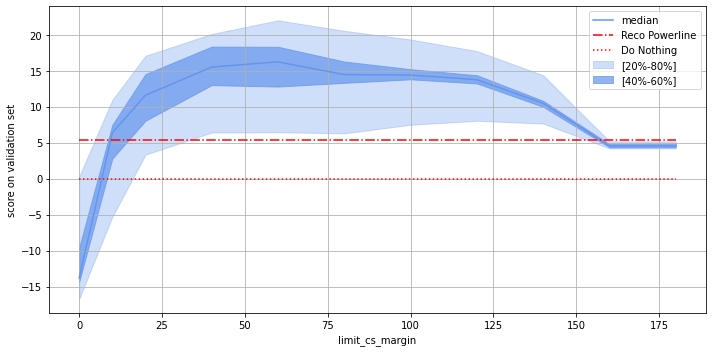

In [49]:
x_plt = sorted(score_safe_max_rho.keys(),
               key=lambda x: float(x))
x_displ = [float(el) for el in x_plt]
# x_displ = [el for el in x_plt]
plt.rcParams["figure.figsize"] = (10,5)
plt.fill_between(x_displ,
                 y1=[score_safe_max_rho[el][0] for el in x_plt],
                 y2=[score_safe_max_rho[el][4] for el in x_plt],
                 color="cornflowerblue",
                 alpha=0.3,
                 label=f"[{percentile_[0]}%-{percentile_[-1]}%]"
                 )
plt.fill_between(x_displ,
                 y1=[score_safe_max_rho[el][1] for el in x_plt],
                 y2=[score_safe_max_rho[el][3] for el in x_plt],
                 color="cornflowerblue",
                 alpha=0.7,
                 label=f"[{percentile_[1]}%-{percentile_[-2]}%]"
                 )
plt.plot(x_displ,
         [score_safe_max_rho[el][2] for el in x_plt], 
         color="cornflowerblue",
         label="median")
if True:
    plt.plot((x_displ[0], x_displ[-1]),
             [score_reco, score_reco],
             color="red",
             linestyle="-.",
             label="Reco Powerline")
    plt.plot((x_displ[0], x_displ[-1]),
             [0., 0.],
             color="red",
             linestyle=":",
             label="Do Nothing")
plt.xlabel("safe_max_rho")
plt.xlabel("limit_cs_margin")
plt.ylabel("score on validation set")
plt.grid()
plt.legend() # loc="upper left")
plt.tight_layout()
